# TensorFlow基础

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

## 数据类型

### 数值类型

一、张量的数据形式

标量(scalar)：数据单独的一个数，零维张量，其形状如：shape=()

向量(vector) ：一维数组，一维张量，其形状如：shape=(3,)

矩阵(matrix)：二维数组，二维张量，其形状如：shape=(3,3)

多维数组(n-d array)：多维数组，多维张量，其形状如：shape=(1,3,3)


标量在 TensorFlow 是如何创建的

In [2]:
# python 语言方式创建标量
a = 1.2 
# TF 方式创建标量
aa = tf.constant(1.2)

type(a), type(aa), tf.is_tensor(aa)

(float, tensorflow.python.framework.ops.EagerTensor, True)

如果要使用 TensorFlow 提供的功能函数， 须通过 TensorFlow 规定的方式去创建张量，而不能使用 Python 语言的标准变量创建方式。

In [3]:
x = tf.constant([1,2.,3.3])
# 打印 TF 张量的相关信息                
x

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1. , 2. , 3.3], dtype=float32)>

In [4]:
# 将 TF 张量的数据导出为 numpy 数组格式
x.numpy() 

array([1. , 2. , 3.3], dtype=float32)

与标量不同，向量的定义须通过 List 容器传给 tf.constant()函数。

创建一个元素的向量：

In [5]:
# 创建一个元素的向量
a = tf.constant([1.2]) 
a, a.shape

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.2], dtype=float32)>,
 TensorShape([1]))

创建 3 个元素的向量：

In [6]:
 # 创建 3 个元素的向量
a = tf.constant([1,2, 3.])
a, a.shape

(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>,
 TensorShape([3]))

定义矩阵

In [7]:
# 创建 2 行 2 列的矩阵
a = tf.constant([[1,2],[3,4]]) 
a, a.shape

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4]])>,
 TensorShape([2, 2]))

三维张量可以定义为：

In [8]:
# 创建 3 维张量
tf.constant([[[1,2],[3,4]],[[5,6],[7,8]]]) 

<tf.Tensor: shape=(2, 2, 2), dtype=int32, numpy=
array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])>

通过传入字符串对象即可创建字符串类型的张量

In [9]:
# 创建字符串
a = tf.constant('Hello, Deep Learning.') 
a

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello, Deep Learning.'>

### 字符串类型

通过传入字符串对象即可创建字符串类型的张量

In [10]:
# 创建字符串
a = tf.constant('Hello, Deep Learning.') 
a

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello, Deep Learning.'>

在 tf.strings 模块中，提供了常见的字符串类型的工具函数，如小写化 lower()、 拼接
join()、 长度 length()、 切分 split()等。

In [11]:
# 小写化字符串
tf.strings.lower(a) 

<tf.Tensor: shape=(), dtype=string, numpy=b'hello, deep learning.'>

### 布尔类型
布尔类型的张量只需要传入 Python 语言的布尔类型数据，转换成 TensorFlow 内部布尔型即可。

In [12]:
# 创建布尔类型标量
tf.constant(True) 

<tf.Tensor: shape=(), dtype=bool, numpy=True>

创建布尔类型的向量

In [13]:
 # 创建布尔类型向量
tf.constant([True, False])

<tf.Tensor: shape=(2,), dtype=bool, numpy=array([ True, False])>

需要注意的是， TensorFlow 的布尔类型和 Python 语言的布尔类型并不等价，不能通用

In [14]:
# 创建 TF 布尔张量
a = tf.constant(True) 
# TF 布尔类型张量与 python 布尔类型比较
print(a is True) 
# 仅数值比较
print(a == True) 

False
tf.Tensor(True, shape=(), dtype=bool)


## 数值精度

在创建张量时，可以指定张量的保存精度

In [15]:
# 创建指定精度的张量
tf.constant(123456789, dtype=tf.int16)

<tf.Tensor: shape=(), dtype=int16, numpy=-13035>

In [16]:
tf.constant(123456789, dtype=tf.int32)

<tf.Tensor: shape=(), dtype=int32, numpy=123456789>

对于浮点数， 高精度的张量可以表示更精准的数据，例如采用 tf.float32 精度保存π时，实际保存的数据为 3.1415927

In [17]:
import numpy as np
# 从 numpy 中导入 pi 常量
np.pi 
# 32 位
tf.constant(np.pi, dtype=tf.float32) 

<tf.Tensor: shape=(), dtype=float32, numpy=3.1415927>

如果采用 tf.float64 精度保存π，则能获得更高的精度

In [18]:
tf.constant(np.pi, dtype=tf.float64) # 64 位

<tf.Tensor: shape=(), dtype=float64, numpy=3.141592653589793>

### 读取精度

通过访问张量的 dtype 成员属性可以判断张量的保存精度

In [19]:
a = tf.constant(np.pi, dtype=tf.float16)

# 读取原有张量的数值精度
print('before:',a.dtype) 
# 如果精度不符合要求，则进行转换
if a.dtype != tf.float32: 
    # tf.cast 函数可以完成精度转换
    a = tf.cast(a,tf.float32) 
# 打印转换后的精度
print('after :',a.dtype) 

before: <dtype: 'float16'>
after : <dtype: 'float32'>


### 类型转换
系统的每个模块使用的数据类型、 数值精度可能各不相同， 对于不符合要求的张量的类型及精度， 需要通过 tf.cast 函数进行转换

In [20]:
# 创建 tf.float16 低精度张量
a = tf.constant(np.pi, dtype=tf.float16) 
# 转换为高精度张量
tf.cast(a, tf.double) 

<tf.Tensor: shape=(), dtype=float64, numpy=3.140625>

进行类型转换时，需要保证转换操作的合法性， 例如将高精度的张量转换为低精度的张量时，可能发生数据溢出隐患：

In [21]:
a = tf.constant(123456789, dtype=tf.int32)
# 转换为低精度整型
tf.cast(a, tf.int16) 

<tf.Tensor: shape=(), dtype=int16, numpy=-13035>

布尔类型与整型之间相互转换也是合法的， 是比较常见的操作

In [22]:
a = tf.constant([True, False])
# 布尔类型转整型
tf.cast(a, tf.int32) 

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 0])>

一般默认 0 表示 False， 1 表示 True，在 TensorFlow 中，将非 0 数字都视为 True，

In [23]:
a = tf.constant([-1, 0, 1, 2])
# 整型转布尔类型
tf.cast(a, tf.bool) 

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True, False,  True,  True])>

## 待优化张量

TensorFlow 增加了一种专门的数据类型来支持梯度信息的记录： tf.Variable。 tf.Variable 类型在普通的张量类型基础上添加了 name， trainable 等属性来支持计算图的构建。

In [24]:
# 创建 TF 张量
a = tf.constant([-1, 0, 1, 2]) 
# 转换为 Variable 类型
aa = tf.Variable(a) 
# Variable 类型张量的属性
aa.name, aa.trainable 

('Variable:0', True)

name 属性用于命名计算图中的变量，这套命名体系是 TensorFlow 内部维护的， 一般不需要用户关注 name 属性；   
trainable属性表征当前张量是否需要被优化，创建 Variable 对象时是默认启用优化标志，可以设置trainable=False 来设置张量不需要优化。

In [25]:
# 直接创建 Variable 张量
tf.Variable([[1,2],[3,4]]) 

<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[1, 2],
       [3, 4]])>

## 创建张量

### 从数组、列表对象创建

通过 tf.convert_to_tensor 函数可以创建新 Tensor，并将保存在 Python List 对象或者Numpy Array 对象中的数据导入到新 Tensor 中。

In [26]:
# 从列表创建张量
tf.convert_to_tensor([1,2.]) 

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 2.], dtype=float32)>

In [27]:
# 从数组中创建张量
tf.convert_to_tensor(np.array([[1,2.],[3,4]])) 

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[1., 2.],
       [3., 4.]])>

### 创建全0或全1张量

In [28]:
# 创建全 0，全 1 的标量
tf.zeros([]),tf.ones([]) 

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

In [29]:
# 创建全 0，全 1 的向量
tf.zeros([1]),tf.ones([1]) 

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)

创建全 0 的矩阵

In [30]:
# 创建全 0 矩阵，指定 shape 为 2 行 2 列
tf.zeros([2,2]) 

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>

创建全 1 的矩阵

In [31]:
# 创建全 1 矩阵，指定 shape 为 3 行 2 列
tf.ones([3,2]) 

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

通过 tf.zeros_like, tf.ones_like 可以方便地新建与某个张量 shape 一致， 且内容为全 0 或全 1 的张量。

In [32]:
# 创建一个矩阵
a = tf.ones([2,3]) 
# 创建一个与 a 形状相同，但是全 0 的新矩阵
tf.zeros_like(a) 

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

创建与张量A形状一样的全 1 张量

In [33]:
# 创建一个矩阵
a = tf.zeros([3,2]) 
# 创建一个与 a 形状相同，但是全 1 的新矩阵
tf.ones_like(a) 

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

### 创建自定义数值张量

通过 tf.fill(shape, value)可以创建全为自定义数值 value 的张量，形状由 shape 参数指定。

In [34]:
# 创建-1 的标量
tf.fill([], -1) 

<tf.Tensor: shape=(), dtype=int32, numpy=-1>

In [35]:
# 创建-1 的向量
tf.fill([1], -1) 

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([-1])>

In [36]:
# 创建 2 行 2 列，元素全为 99 的矩阵
tf.fill([2,2], 99) 

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[99, 99],
       [99, 99]])>

### 创建已知分布的张量

通过 tf.random.normal(shape, mean=0.0, stddev=1.0)可以创建形状为 shape，均值为mean，标准差为 stddev 的正态分布$\mathcal{N}(mean, stddev^2)$。

In [37]:
# 创建标准正态分布的张量
tf.random.normal([2,2]) 

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.46067753, -0.80162954],
       [ 2.0413775 , -0.704497  ]], dtype=float32)>

In [38]:
# 创建均值为 1，标准差为 2 的正态分布的张量
tf.random.normal([2,2], mean=1,stddev=2) 

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.9105985, 1.4723796],
       [0.6097573, 1.8325226]], dtype=float32)>

通过 tf.random.uniform(shape, minval=0, maxval=None, dtype=tf.float32)可以创建采样自[minval, maxval)区间的均匀分布的张量

In [39]:
# 创建采样自[0,1)均匀分布的矩阵
tf.random.uniform([3,2]) 

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0.40507984, 0.2936803 ],
       [0.10381484, 0.23867631],
       [0.63906336, 0.05123353]], dtype=float32)>

In [40]:
# 创建采样自[0,10)均匀分布的矩阵
tf.random.uniform([2,2],maxval=10) 

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4.8819246, 9.214917 ],
       [8.908993 , 2.9890501]], dtype=float32)>

如果需要均匀采样整形类型的数据，必须指定采样区间的最大值 maxval 参数，同时指定数据类型为 tf.int*型

In [41]:
# 创建采样自[0,100)均匀分布的整型矩阵
tf.random.uniform([2,2],maxval=100,dtype=tf.int32)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[35, 45],
       [73, 53]])>

### 创建序列

tf.range(limit, delta=1)可以创建[0, limit)之间，步长为 delta 的整型序列，不包含 limit 本身。

In [42]:
# 0~10，不包含 10
tf.range(10) 

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [43]:
# 创建 0~10，步长为 2 的整形序列
tf.range(10,delta=2)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 2, 4, 6, 8])>

In [44]:
tf.range(1,10,delta=2) # 1~10

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 3, 5, 7, 9])>

## 张量的典型应用

### 标量

In [45]:
# 随机模拟网络输出
out = tf.random.uniform([4,10]) 
# 随机构造样本真实标签
y = tf.constant([2,3,2,0]) 
# one-hot 编码
y = tf.one_hot(y, depth=10) 
# 计算每个样本的 MSE
loss = tf.keras.losses.mse(y, out) 
# 平均 MSE,loss 应是标量
loss = tf.reduce_mean(loss) 
print(loss)

tf.Tensor(0.3142045, shape=(), dtype=float32)


### 向量

考虑 2 个输出节点的网络层， 我们创建长度为 2 的偏置向量b，并累加在每个输出节点上：

In [46]:
# z=wx,模拟获得激活函数的输入 z
z = tf.random.normal([4,2])
# 创建偏置向量
b = tf.zeros([2])
# 累加上偏置向量
z = z + b 
z

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[-1.0551764 , -0.7158551 ],
       [ 0.6540193 ,  0.03449329],
       [ 1.4088888 ,  0.3975852 ],
       [-0.3390571 , -1.5231084 ]], dtype=float32)>

创建输入节点数为 4，输出节点数为 3 的线性层网络，那么它的偏置向量 b 的长度应为 3

In [47]:
# 创建一层 Wx+b，输出节点为 3
fc = tf.keras.layers.Dense(3) 
# 通过 build 函数创建 W,b 张量，输入节点为 4
fc.build(input_shape=(2,4))
# 查看偏置向量
fc.bias 

<tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>

### 矩阵

In [48]:
# 2 个样本，特征长度为 4 的张量
x = tf.random.normal([2,4]) 
# 定义 W 张量
w = tf.ones([4,3])
# 定义 b 张量
b = tf.zeros([3]) 
# X@W+b 运算
o = x@w+b 
o

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[-0.68012226, -0.68012226, -0.68012226],
       [ 3.877089  ,  3.877089  ,  3.877089  ]], dtype=float32)>

In [49]:
# 定义全连接层的输出节点为 3
fc = tf.keras.layers.Dense(3) 
# 定义全连接层的输入节点为 4
fc.build(input_shape=(2,4)) 
# 查看权值矩阵 W
fc.kernel 

<tf.Variable 'kernel:0' shape=(4, 3) dtype=float32, numpy=
array([[ 0.2448467 , -0.30665004, -0.01243961],
       [ 0.03833795, -0.36021662,  0.3461665 ],
       [-0.02943492, -0.18655735, -0.39552897],
       [-0.12379485, -0.56200117,  0.03996301]], dtype=float32)>

### 三维张量

In [50]:
# 自动加载 IMDB 电影评价数据集
(x_train,y_train),(x_test,y_test)=keras.datasets.imdb.load_data(num_words=10000)
# 将句子填充、截断为等长 80 个单词的句子
x_train = keras.preprocessing.sequence.pad_sequences(x_train,maxlen=80)
x_train.shape

(25000, 80)

可以看到 x_train 张量的 shape 为[25000,80]，其中 25000 表示句子个数， 80 表示每个句子共 80 个单词，每个单词使用数字编码方式表示。

我们通过 layers.Embedding 层将数字编码的单词转换为长度为 100 个词向量：

In [51]:
# 创建词向量 Embedding 层类
embedding = tf.keras.layers.Embedding(10000, 100)
# 将数字编码的单词转换为词向量
out = embedding(x_train)
out.shape

TensorShape([25000, 80, 100])

可以看到，经过 Embedding 层编码后，句子张量的 shape 变为[25000,80,100]，其中 100 表示每个单词编码为长度是 100 的向量。

### 四维张量

In [52]:
# 创建 32x32 的彩色图片输入，个数为 4
x = tf.random.normal([4,32,32,3])
# 创建卷积神经网络
layer = layers.Conv2D(16, kernel_size=3)
# 前向计算
out = layer(x) 
# 输出大小
out.shape 

TensorShape([4, 30, 30, 16])

In [53]:
# 访问卷积核张量
layer.kernel.shape 

TensorShape([3, 3, 3, 16])

## 索引与切片
### 索引

In [54]:
# 创建4维张量
x = tf.random.normal([4,32,32,3]) 

In [55]:
# 取第 1 张图片的数据
x[0]

<tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
array([[[-1.7450261 , -0.7572388 , -1.0334352 ],
        [-1.1375818 , -0.24446957,  0.65341866],
        [-0.6467867 , -0.33060476,  0.20179671],
        ...,
        [-0.4285335 ,  1.9864025 , -1.030697  ],
        [-0.3670462 ,  0.62237525, -1.158764  ],
        [ 0.926135  , -0.09735158, -0.6583162 ]],

       [[ 0.7422131 , -0.05145269, -0.75104904],
        [-0.21416299, -1.5760541 ,  0.179844  ],
        [ 1.1409987 ,  0.21907268,  0.25540105],
        ...,
        [-0.5650806 , -0.03417177,  0.60237026],
        [ 0.22042844, -0.43259314,  0.7654637 ],
        [ 0.20122151,  1.3466872 ,  1.4180492 ]],

       [[-0.22506309, -0.71598977,  0.26109946],
        [-1.3896623 , -0.1084232 ,  1.2113979 ],
        [ 0.32082868, -1.9174163 , -1.1264993 ],
        ...,
        [-1.5208955 ,  0.8980872 , -1.0759847 ],
        [ 0.38827342,  0.00699212, -0.9972251 ],
        [ 1.6310918 ,  1.2874713 , -1.3846053 ]],

       ...,

       

In [56]:
# 取第 1 张图片的第 2 行
x[0][1]

<tf.Tensor: shape=(32, 3), dtype=float32, numpy=
array([[ 0.7422131 , -0.05145269, -0.75104904],
       [-0.21416299, -1.5760541 ,  0.179844  ],
       [ 1.1409987 ,  0.21907268,  0.25540105],
       [-1.0115812 ,  0.05704358, -1.0794528 ],
       [ 0.2881808 ,  0.5391571 ,  0.05286413],
       [-0.8382589 ,  0.58902544, -0.7153479 ],
       [ 2.1875176 , -0.14989942, -2.5793183 ],
       [-1.7482921 , -0.27966794,  1.0802065 ],
       [ 0.6097452 ,  0.05305016,  0.46549168],
       [-0.43974707, -0.33738297,  0.9995111 ],
       [ 0.04269314,  0.4440102 ,  0.29092273],
       [ 1.5975004 , -0.70367974,  2.9514217 ],
       [ 2.393892  , -0.40354803,  0.11187057],
       [ 1.9373498 ,  0.05829722,  0.7606074 ],
       [ 1.2094123 , -1.9018784 ,  0.27969465],
       [-0.6300282 ,  0.12909369,  0.32354122],
       [-0.29742804, -1.2199006 , -1.1213259 ],
       [-0.6155078 , -1.0320498 , -1.7355599 ],
       [-1.1949977 ,  1.2732787 , -0.10690398],
       [-0.9667211 , -1.9602499 , -0.87

In [57]:
# 取第 1 张图片，第 2 行，第 3 列的数据
x[0][1][2]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1.1409987 , 0.21907268, 0.25540105], dtype=float32)>

In [58]:
# 取第 3 张图片，第 2 行，第 1 列的像素， B 通道(第 2 个通道)颜色强度值
x[2][1][0][1]

<tf.Tensor: shape=(), dtype=float32, numpy=-0.8613874>

In [59]:
# 取第 2 张图片，第 10 行，第 3 列的数据
x[1,9,2]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-1.1750896 , -0.14908317,  0.29494122], dtype=float32)>

### 切片

In [60]:
# 读取第 2,3 张图片
x[1:3]

<tf.Tensor: shape=(2, 32, 32, 3), dtype=float32, numpy=
array([[[[ 3.75269502e-01,  1.08738494e+00, -1.19178498e+00],
         [-7.59101510e-01, -1.18816829e+00, -1.64365315e+00],
         [-3.82422864e-01,  7.30894744e-01,  1.61891490e-01],
         ...,
         [-3.25597972e-01, -4.47040945e-02,  9.57851827e-01],
         [-2.41981220e+00, -2.93832142e-02,  4.88606632e-01],
         [ 1.17362626e-01,  1.09279013e+00,  9.93007123e-01]],

        [[ 5.63674510e-01, -1.25167632e+00,  4.20372225e-02],
         [ 1.15782154e+00,  5.74528635e-01,  2.08755350e+00],
         [-1.46936619e+00,  3.45582962e-01, -1.42393457e-02],
         ...,
         [ 3.52954902e-02,  6.16750598e-01, -8.58375728e-01],
         [-1.90039463e-02,  4.89505194e-02,  5.45632839e-01],
         [-7.45874420e-02,  2.50217527e-01,  7.86766410e-01]],

        [[ 2.30238819e+00, -8.31172168e-01, -2.40907431e+00],
         [ 1.44522929e+00,  1.57444406e+00,  1.93837631e+00],
         [ 4.72356826e-02, -3.10419559e+00, 

In [61]:
# 读取第一张图片
x[0,::] 

<tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
array([[[-1.7450261 , -0.7572388 , -1.0334352 ],
        [-1.1375818 , -0.24446957,  0.65341866],
        [-0.6467867 , -0.33060476,  0.20179671],
        ...,
        [-0.4285335 ,  1.9864025 , -1.030697  ],
        [-0.3670462 ,  0.62237525, -1.158764  ],
        [ 0.926135  , -0.09735158, -0.6583162 ]],

       [[ 0.7422131 , -0.05145269, -0.75104904],
        [-0.21416299, -1.5760541 ,  0.179844  ],
        [ 1.1409987 ,  0.21907268,  0.25540105],
        ...,
        [-0.5650806 , -0.03417177,  0.60237026],
        [ 0.22042844, -0.43259314,  0.7654637 ],
        [ 0.20122151,  1.3466872 ,  1.4180492 ]],

       [[-0.22506309, -0.71598977,  0.26109946],
        [-1.3896623 , -0.1084232 ,  1.2113979 ],
        [ 0.32082868, -1.9174163 , -1.1264993 ],
        ...,
        [-1.5208955 ,  0.8980872 , -1.0759847 ],
        [ 0.38827342,  0.00699212, -0.9972251 ],
        [ 1.6310918 ,  1.2874713 , -1.3846053 ]],

       ...,

       

In [62]:
x[:,0:28:2,0:28:2,:]

<tf.Tensor: shape=(4, 14, 14, 3), dtype=float32, numpy=
array([[[[-1.74502611e+00, -7.57238805e-01, -1.03343523e+00],
         [-6.46786690e-01, -3.30604762e-01,  2.01796710e-01],
         [-1.39652684e-01,  1.11349261e+00, -4.37843531e-01],
         ...,
         [ 2.33928308e-01, -8.38892758e-01, -5.08989036e-01],
         [ 9.19142902e-01, -1.48180306e+00,  1.48225129e+00],
         [-1.08102119e+00, -1.12764382e+00, -1.01000130e+00]],

        [[-2.25063086e-01, -7.15989769e-01,  2.61099458e-01],
         [ 3.20828676e-01, -1.91741633e+00, -1.12649930e+00],
         [ 4.44881290e-01,  2.03384209e+00,  5.05309924e-03],
         ...,
         [ 4.73196000e-01,  2.53800249e+00,  2.55634880e+00],
         [-7.71026373e-01, -1.09348893e-01, -1.78558254e+00],
         [ 2.87946105e-01,  2.13401303e-01,  1.79187641e-01]],

        [[-3.96388382e-01, -7.97443032e-01,  7.98904955e-01],
         [ 1.31878877e+00,  1.75256097e+00, -4.03931320e-01],
         [-5.42645037e-01, -1.58776566e-01, 

In [63]:
# 考虑一个 0~9 的简单序列向量， 逆序取到第 1 号元素，不包含第 1 号
# 创建 0~9 向量
x = tf.range(9) 
# 从 8 取到 0，逆序，不包含 0
x[8:0:-1] 

<tf.Tensor: shape=(8,), dtype=int32, numpy=array([8, 7, 6, 5, 4, 3, 2, 1])>

In [64]:
# 逆序全部元素
x[::-1] 

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([8, 7, 6, 5, 4, 3, 2, 1, 0])>

In [65]:
# 逆序间隔采样
x[::-2] 

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([8, 6, 4, 2, 0])>

读取每张图片的所有通道，其中行按着逆序隔行采样，列按着逆序隔行采样

In [66]:
x = tf.random.normal([4,32,32,3])
# 行、列逆序间隔采样
x[0,::-2,::-2] 

<tf.Tensor: shape=(16, 16, 3), dtype=float32, numpy=
array([[[-6.09962761e-01,  1.93407446e-01,  5.28300941e-01],
        [-2.32661462e+00,  1.08571970e+00,  5.59375823e-01],
        [-4.00491327e-01, -3.57767165e-01,  4.20534499e-02],
        [-1.21397384e-01,  1.58362687e+00, -5.19303679e-01],
        [ 1.46465704e-01, -1.35310754e-01, -2.45350704e-01],
        [-5.32628477e-01,  7.85642087e-01,  4.84743297e-01],
        [ 5.31589150e-01,  2.98292041e-01, -3.53698224e-01],
        [-1.60514355e+00,  1.32932425e+00,  1.44127679e+00],
        [ 3.02087981e-02,  1.37136793e+00, -1.59377322e-01],
        [ 1.39672697e-01,  4.23355073e-01,  1.02963710e+00],
        [ 5.83233312e-02, -5.28961301e-01, -7.11210743e-02],
        [ 1.02563179e+00,  6.82720304e-01, -6.93476617e-01],
        [-2.45665073e+00, -1.24394536e+00,  5.97246766e-01],
        [ 2.38930508e-01,  1.16224027e+00,  2.17213583e+00],
        [-8.45830142e-01, -3.94775486e-03,  2.72814780e-01],
        [ 1.62686408e+00, -1.487

In [67]:
# 取 G 通道数据
x[:,:,:,1] 

<tf.Tensor: shape=(4, 32, 32), dtype=float32, numpy=
array([[[-0.38865417,  0.26907903,  0.43410304, ...,  1.3125119 ,
          0.9562874 , -0.6185431 ],
        [ 0.44053298, -0.2976439 ,  2.6388676 , ..., -0.93992203,
         -0.6754544 ,  1.0018622 ],
        [-0.4158239 , -0.6978231 , -2.1026795 , ..., -0.8645744 ,
          0.66367435,  0.22734646],
        ...,
        [-0.7535494 , -1.9197066 ,  2.6120846 , ..., -0.02863584,
          0.4768737 ,  1.6096514 ],
        [ 0.48834637,  2.2084682 , -0.15018792, ..., -0.3563923 ,
         -1.7897338 , -1.7991705 ],
        [-1.6766123 , -1.4874387 ,  0.25269464, ...,  1.0857197 ,
         -0.4512363 ,  0.19340745]],

       [[-2.1271038 ,  0.17787853,  0.5725525 , ..., -0.11537506,
          0.09877823, -1.0606889 ],
        [-0.06741264, -1.8304873 , -0.9258254 , ..., -1.2561408 ,
         -0.46134752,  1.6232399 ],
        [-0.9505743 ,  1.893499  ,  1.6757499 , ...,  0.9129512 ,
         -1.2663449 ,  0.00658072],
        ...,
 

In [68]:
# 读取第 1~2 张图片的 G/B 通道数据
# 高宽维度全部采集
x[0:2,...,1:] 

<tf.Tensor: shape=(2, 32, 32, 2), dtype=float32, numpy=
array([[[[-0.38865417,  0.09541716],
         [ 0.26907903, -0.96798986],
         [ 0.43410304,  0.85659987],
         ...,
         [ 1.3125119 , -1.3867877 ],
         [ 0.9562874 ,  1.896766  ],
         [-0.6185431 ,  0.6965917 ]],

        [[ 0.44053298, -0.20525137],
         [-0.2976439 , -0.6040244 ],
         [ 2.6388676 , -1.6207676 ],
         ...,
         [-0.93992203, -0.66915965],
         [-0.6754544 ,  1.3710521 ],
         [ 1.0018622 , -1.779495  ]],

        [[-0.4158239 , -0.3536431 ],
         [-0.6978231 ,  0.14491245],
         [-2.1026795 ,  1.187475  ],
         ...,
         [-0.8645744 ,  0.6424525 ],
         [ 0.66367435,  1.4718544 ],
         [ 0.22734646, -0.06782107]],

        ...,

        [[-0.7535494 , -0.34313807],
         [-1.9197066 , -0.18565777],
         [ 2.6120846 ,  0.42992735],
         ...,
         [-0.02863584, -0.51061404],
         [ 0.4768737 , -2.5116677 ],
         [ 1.6096

In [69]:
# 读取最后 2 张图片
# 高、宽、通道维度全部采集，等价于 x[2:]
x[2:,...] 

<tf.Tensor: shape=(2, 32, 32, 3), dtype=float32, numpy=
array([[[[ 6.74123883e-01, -1.88368511e+00, -8.89203072e-01],
         [ 8.38038027e-02, -1.27604574e-01,  1.58988729e-01],
         [-4.41695720e-01,  1.03381312e+00, -1.01159029e-01],
         ...,
         [-7.16900170e-01, -1.29135263e+00,  1.56265855e+00],
         [ 1.16747844e+00,  8.22223186e-01, -2.48018071e-01],
         [ 2.49376774e-01, -1.54972494e+00, -6.98982537e-01]],

        [[-5.15505791e-01, -2.90100962e-01,  1.37397456e+00],
         [ 1.62653875e+00,  1.02837563e+00,  1.28304017e+00],
         [ 8.17742586e-01, -1.27353036e+00, -1.29380333e+00],
         ...,
         [-2.23944235e+00,  1.34231877e+00, -5.94248891e-01],
         [-1.26369643e+00, -1.18198729e+00, -2.81738080e-02],
         [ 4.75413352e-01, -7.36744940e-01, -8.91730845e-01]],

        [[ 1.99938849e-01, -6.70415640e-01,  9.14317548e-01],
         [-3.14006031e-01, -2.88717127e+00, -2.33328342e-01],
         [ 7.91864097e-01, -7.57431388e-01, 

In [70]:
# 读取 R/G 通道数据
# 所有样本，所有高、宽的前 2 个通道
x[...,:2] 

<tf.Tensor: shape=(4, 32, 32, 2), dtype=float32, numpy=
array([[[[ 1.19780111e+00, -3.88654172e-01],
         [ 1.14581382e+00,  2.69079030e-01],
         [-2.77974272e+00,  4.34103042e-01],
         ...,
         [ 4.63154674e-01,  1.31251192e+00],
         [-1.61533272e+00,  9.56287384e-01],
         [ 2.03971431e-01, -6.18543088e-01]],

        [[-1.49999931e-01,  4.40532982e-01],
         [ 1.16467953e+00, -2.97643900e-01],
         [-5.78408480e-01,  2.63886762e+00],
         ...,
         [-1.00408971e+00, -9.39922035e-01],
         [-6.99904919e-01, -6.75454378e-01],
         [-4.77834970e-01,  1.00186217e+00]],

        [[-2.11601400e+00, -4.15823907e-01],
         [-1.28382933e+00, -6.97823107e-01],
         [-1.24438286e+00, -2.10267949e+00],
         ...,
         [-1.48504436e+00, -8.64574373e-01],
         [-4.81069267e-01,  6.63674355e-01],
         [ 2.36261353e-01,  2.27346465e-01]],

        ...,

        [[ 3.57793421e-02, -7.53549397e-01],
         [-2.12307662e-01, 

## 维度变换

### 改变视图

In [71]:
# 生成向量
x=tf.range(96)
# 改变 x 的视图，获得 4D 张量，存储并未改变
x=tf.reshape(x,[2,4,4,3]) 
x

<tf.Tensor: shape=(2, 4, 4, 3), dtype=int32, numpy=
array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17],
         [18, 19, 20],
         [21, 22, 23]],

        [[24, 25, 26],
         [27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44],
         [45, 46, 47]]],


       [[[48, 49, 50],
         [51, 52, 53],
         [54, 55, 56],
         [57, 58, 59]],

        [[60, 61, 62],
         [63, 64, 65],
         [66, 67, 68],
         [69, 70, 71]],

        [[72, 73, 74],
         [75, 76, 77],
         [78, 79, 80],
         [81, 82, 83]],

        [[84, 85, 86],
         [87, 88, 89],
         [90, 91, 92],
         [93, 94, 95]]]])>

### 改变视图

我们通过 tf.range()模拟生成一个向量数据，并通过 tf.reshape 视图改变函数产生不同的视图

In [72]:
# 生成向量
x = tf.range(96) 
# 改变 x 的视图，获得 4D 张量，存储并未改变
x = tf.reshape(x,[2,4,4,3]) 
x

<tf.Tensor: shape=(2, 4, 4, 3), dtype=int32, numpy=
array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17],
         [18, 19, 20],
         [21, 22, 23]],

        [[24, 25, 26],
         [27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44],
         [45, 46, 47]]],


       [[[48, 49, 50],
         [51, 52, 53],
         [54, 55, 56],
         [57, 58, 59]],

        [[60, 61, 62],
         [63, 64, 65],
         [66, 67, 68],
         [69, 70, 71]],

        [[72, 73, 74],
         [75, 76, 77],
         [78, 79, 80],
         [81, 82, 83]],

        [[84, 85, 86],
         [87, 88, 89],
         [90, 91, 92],
         [93, 94, 95]]]])>

In [73]:
# 获取张量的维度数和形状列表
x.ndim,x.shape 

(4, TensorShape([2, 4, 4, 3]))

通过 tf.reshape(x, new_shape)，可以将张量的视图任意地合法改变

In [74]:
tf.reshape(x,[2,-1])

<tf.Tensor: shape=(2, 48), dtype=int32, numpy=
array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
        64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
        80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]])>

In [75]:
tf.reshape(x,[2,4,12])

<tf.Tensor: shape=(2, 4, 12), dtype=int32, numpy=
array([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
        [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]],

       [[48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71],
        [72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83],
        [84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]]])>

In [76]:
tf.reshape(x,[2,-1,3])

<tf.Tensor: shape=(2, 16, 3), dtype=int32, numpy=
array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29],
        [30, 31, 32],
        [33, 34, 35],
        [36, 37, 38],
        [39, 40, 41],
        [42, 43, 44],
        [45, 46, 47]],

       [[48, 49, 50],
        [51, 52, 53],
        [54, 55, 56],
        [57, 58, 59],
        [60, 61, 62],
        [63, 64, 65],
        [66, 67, 68],
        [69, 70, 71],
        [72, 73, 74],
        [75, 76, 77],
        [78, 79, 80],
        [81, 82, 83],
        [84, 85, 86],
        [87, 88, 89],
        [90, 91, 92],
        [93, 94, 95]]])>

### 增、删维度

In [77]:
# 产生矩阵
x = tf.random.uniform([28,28],maxval=10,dtype=tf.int32)
x

<tf.Tensor: shape=(28, 28), dtype=int32, numpy=
array([[9, 9, 1, 9, 8, 0, 0, 4, 5, 7, 4, 9, 1, 7, 0, 1, 2, 3, 4, 9, 3, 8,
        4, 0, 0, 2, 1, 1],
       [5, 7, 5, 2, 5, 9, 8, 5, 8, 3, 7, 9, 7, 9, 9, 1, 3, 3, 8, 0, 8, 4,
        1, 2, 3, 5, 8, 1],
       [3, 3, 1, 7, 6, 4, 6, 2, 8, 0, 4, 6, 1, 9, 7, 3, 8, 1, 1, 3, 6, 5,
        3, 9, 3, 2, 4, 2],
       [6, 9, 9, 1, 2, 7, 7, 8, 8, 3, 1, 8, 4, 1, 7, 4, 6, 5, 5, 8, 4, 2,
        3, 6, 6, 4, 1, 8],
       [8, 0, 5, 5, 6, 6, 8, 6, 6, 0, 3, 2, 0, 9, 2, 1, 5, 6, 5, 3, 8, 4,
        0, 5, 8, 6, 7, 8],
       [2, 1, 4, 1, 4, 1, 2, 5, 1, 5, 0, 3, 8, 4, 0, 7, 3, 9, 3, 5, 3, 8,
        9, 9, 0, 1, 6, 4],
       [3, 4, 6, 8, 5, 9, 9, 8, 0, 2, 2, 3, 8, 9, 3, 3, 8, 7, 0, 0, 7, 0,
        1, 7, 3, 0, 0, 0],
       [8, 8, 6, 8, 0, 7, 4, 1, 2, 9, 2, 7, 9, 0, 2, 3, 4, 9, 9, 5, 4, 9,
        1, 9, 8, 1, 5, 7],
       [7, 1, 7, 9, 3, 9, 3, 9, 1, 0, 8, 6, 6, 7, 5, 5, 5, 9, 8, 7, 2, 2,
        5, 7, 5, 8, 9, 5],
       [8, 2, 8, 5, 4, 9, 0, 9, 3, 9, 9, 9,

通过 tf.expand_dims(x, axis)可在指定的 axis 轴前可以插入一个新的维度

In [78]:
# axis=2 表示宽维度后面的一个维度
x = tf.expand_dims(x,axis=2) 
x

<tf.Tensor: shape=(28, 28, 1), dtype=int32, numpy=
array([[[9],
        [9],
        [1],
        [9],
        [8],
        [0],
        [0],
        [4],
        [5],
        [7],
        [4],
        [9],
        [1],
        [7],
        [0],
        [1],
        [2],
        [3],
        [4],
        [9],
        [3],
        [8],
        [4],
        [0],
        [0],
        [2],
        [1],
        [1]],

       [[5],
        [7],
        [5],
        [2],
        [5],
        [9],
        [8],
        [5],
        [8],
        [3],
        [7],
        [9],
        [7],
        [9],
        [9],
        [1],
        [3],
        [3],
        [8],
        [0],
        [8],
        [4],
        [1],
        [2],
        [3],
        [5],
        [8],
        [1]],

       [[3],
        [3],
        [1],
        [7],
        [6],
        [4],
        [6],
        [2],
        [8],
        [0],
        [4],
        [6],
        [1],
        [9],
        [7],
        [3],
        [

In [79]:
x = tf.expand_dims(x,axis=0) # 高维度之前插入新维度
x

<tf.Tensor: shape=(1, 28, 28, 1), dtype=int32, numpy=
array([[[[9],
         [9],
         [1],
         [9],
         [8],
         [0],
         [0],
         [4],
         [5],
         [7],
         [4],
         [9],
         [1],
         [7],
         [0],
         [1],
         [2],
         [3],
         [4],
         [9],
         [3],
         [8],
         [4],
         [0],
         [0],
         [2],
         [1],
         [1]],

        [[5],
         [7],
         [5],
         [2],
         [5],
         [9],
         [8],
         [5],
         [8],
         [3],
         [7],
         [9],
         [7],
         [9],
         [9],
         [1],
         [3],
         [3],
         [8],
         [0],
         [8],
         [4],
         [1],
         [2],
         [3],
         [5],
         [8],
         [1]],

        [[3],
         [3],
         [1],
         [7],
         [6],
         [4],
         [6],
         [2],
         [8],
         [0],
         [4],
    

In [80]:
x = tf.squeeze(x, axis=0) # 删除图片数量维度
x

<tf.Tensor: shape=(28, 28, 1), dtype=int32, numpy=
array([[[9],
        [9],
        [1],
        [9],
        [8],
        [0],
        [0],
        [4],
        [5],
        [7],
        [4],
        [9],
        [1],
        [7],
        [0],
        [1],
        [2],
        [3],
        [4],
        [9],
        [3],
        [8],
        [4],
        [0],
        [0],
        [2],
        [1],
        [1]],

       [[5],
        [7],
        [5],
        [2],
        [5],
        [9],
        [8],
        [5],
        [8],
        [3],
        [7],
        [9],
        [7],
        [9],
        [9],
        [1],
        [3],
        [3],
        [8],
        [0],
        [8],
        [4],
        [1],
        [2],
        [3],
        [5],
        [8],
        [1]],

       [[3],
        [3],
        [1],
        [7],
        [6],
        [4],
        [6],
        [2],
        [8],
        [0],
        [4],
        [6],
        [1],
        [9],
        [7],
        [3],
        [

In [81]:
x = tf.random.uniform([1,28,28,1],maxval=10,dtype=tf.int32)
tf.squeeze(x) # 删除所有长度为 1 的维度

<tf.Tensor: shape=(28, 28), dtype=int32, numpy=
array([[7, 7, 1, 7, 1, 4, 1, 5, 2, 8, 8, 4, 5, 1, 6, 6, 7, 9, 6, 4, 2, 7,
        6, 0, 9, 4, 7, 7],
       [5, 0, 1, 0, 6, 1, 9, 3, 8, 2, 2, 3, 7, 8, 2, 9, 0, 6, 6, 3, 3, 1,
        6, 6, 3, 7, 9, 3],
       [1, 5, 7, 1, 9, 9, 3, 5, 2, 3, 4, 5, 3, 8, 4, 8, 1, 4, 6, 1, 1, 5,
        9, 8, 7, 8, 1, 2],
       [6, 2, 7, 8, 2, 3, 6, 8, 7, 3, 3, 5, 3, 3, 6, 9, 9, 0, 3, 5, 0, 6,
        5, 0, 9, 0, 9, 7],
       [0, 1, 8, 3, 9, 8, 2, 3, 0, 9, 7, 6, 8, 3, 4, 8, 5, 2, 1, 5, 2, 3,
        8, 1, 1, 3, 0, 4],
       [3, 4, 9, 1, 1, 2, 7, 8, 2, 1, 5, 5, 1, 6, 5, 8, 6, 9, 7, 3, 2, 7,
        9, 4, 3, 8, 0, 2],
       [5, 0, 2, 7, 0, 7, 6, 8, 7, 5, 8, 2, 7, 4, 6, 9, 1, 1, 4, 9, 7, 1,
        7, 3, 6, 6, 0, 7],
       [5, 0, 1, 6, 3, 8, 1, 4, 3, 7, 2, 1, 1, 3, 4, 7, 3, 3, 0, 5, 3, 3,
        5, 3, 0, 3, 5, 0],
       [6, 8, 2, 7, 7, 2, 9, 9, 3, 5, 6, 0, 6, 4, 9, 0, 4, 1, 3, 4, 5, 8,
        3, 6, 7, 3, 9, 7],
       [7, 9, 4, 1, 3, 7, 4, 0, 9, 8, 1, 0,

### 交换维度

In [82]:
x = tf.random.normal([2,32,32,3])
# 交换维度
tf.transpose(x,perm=[0,3,1,2]) 

<tf.Tensor: shape=(2, 3, 32, 32), dtype=float32, numpy=
array([[[[ 1.8320396 ,  0.7884572 ,  2.2952375 , ...,  0.99965906,
           0.47179914, -1.2392385 ],
         [-0.2790963 , -1.900099  ,  0.9289354 , ...,  1.0846897 ,
           0.54981846, -1.2396021 ],
         [ 0.06397729, -0.16979311,  0.20041804, ...,  1.9682915 ,
           0.12054651, -0.14477237],
         ...,
         [-0.7451902 ,  1.0040444 , -0.4640826 , ..., -0.58819354,
           0.4646075 ,  0.33040848],
         [-0.7039945 , -0.2871381 , -1.2854329 , ..., -0.5298408 ,
           1.1984817 , -1.1119671 ],
         [-0.1400329 ,  0.9748489 ,  0.01694189, ..., -0.5952891 ,
          -0.08432785,  0.77033824]],

        [[-1.511571  , -0.44614872, -0.5360325 , ..., -2.4405057 ,
          -0.17982766,  0.55819607],
         [ 0.22918947, -0.41730398, -0.65216804, ..., -0.86923265,
          -2.7684152 ,  0.02984187],
         [ 0.3651999 , -1.50687   ,  0.8671812 , ...,  0.7473599 ,
          -0.5310433 ,  0.862

In [83]:
x = tf.random.normal([2,32,32,3])
# 交换维度
tf.transpose(x,perm=[0,2,1,3]) 

<tf.Tensor: shape=(2, 32, 32, 3), dtype=float32, numpy=
array([[[[-1.205447  ,  0.01185454, -0.0695671 ],
         [-0.7079914 ,  0.4474336 , -0.4563063 ],
         [ 1.3185732 , -0.70920324,  1.007479  ],
         ...,
         [-0.4879324 , -1.1999311 ,  0.9327969 ],
         [-0.8036022 ,  1.7053095 ,  0.84966254],
         [ 1.0679622 , -0.54660314, -0.56089234]],

        [[-0.5643    ,  2.5297205 , -0.80189115],
         [-0.25300097,  1.8100315 , -0.8000928 ],
         [-0.49972332, -1.6671408 , -0.34055942],
         ...,
         [-0.77833295, -1.6121265 , -0.21863812],
         [ 2.4235063 ,  0.7339327 , -0.10279572],
         [ 0.7032747 ,  0.18458733, -0.7139853 ]],

        [[-2.128073  ,  0.44884825,  0.4742213 ],
         [ 0.3762216 , -2.2422678 , -0.008263  ],
         [ 1.4176604 , -0.64210755, -0.01787386],
         ...,
         [-1.1258729 , -0.90672445, -1.4215    ],
         [ 0.29224867,  1.0675457 , -1.3440154 ],
         [ 0.72530466, -1.5519329 , -0.626289  ]

### 复制数据

In [84]:
# 创建向量 b
b = tf.constant([1,2]) 
# 插入新维度，变成矩阵
b = tf.expand_dims(b, axis=0) 
b

<tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[1, 2]])>

In [85]:
# 样本维度上复制一份
b = tf.tile(b, multiples=[2,1]) 
b

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [1, 2]])>

In [86]:
x = tf.range(4)
# 创建 2 行 2 列矩阵
x=tf.reshape(x,[2,2]) 
x

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[0, 1],
       [2, 3]])>

In [87]:
# 列维度复制一份
x = tf.tile(x,multiples=[1,2]) 
x

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[0, 1, 0, 1],
       [2, 3, 2, 3]])>

In [88]:
# 行维度复制一份
x = tf.tile(x,multiples=[2,1]) 
x

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[0, 1, 0, 1],
       [2, 3, 2, 3],
       [0, 1, 0, 1],
       [2, 3, 2, 3]])>

## Broadcasting

In [89]:
# 创建矩阵
A = tf.random.normal([32,1]) 
# 扩展为 4D 张量
tf.broadcast_to(A, [2,32,32,3]) 

<tf.Tensor: shape=(2, 32, 32, 3), dtype=float32, numpy=
array([[[[ 0.17321725,  0.17321725,  0.17321725],
         [-0.3266918 , -0.3266918 , -0.3266918 ],
         [ 1.0556936 ,  1.0556936 ,  1.0556936 ],
         ...,
         [-0.83202094, -0.83202094, -0.83202094],
         [-0.02236545, -0.02236545, -0.02236545],
         [-0.7924351 , -0.7924351 , -0.7924351 ]],

        [[ 0.17321725,  0.17321725,  0.17321725],
         [-0.3266918 , -0.3266918 , -0.3266918 ],
         [ 1.0556936 ,  1.0556936 ,  1.0556936 ],
         ...,
         [-0.83202094, -0.83202094, -0.83202094],
         [-0.02236545, -0.02236545, -0.02236545],
         [-0.7924351 , -0.7924351 , -0.7924351 ]],

        [[ 0.17321725,  0.17321725,  0.17321725],
         [-0.3266918 , -0.3266918 , -0.3266918 ],
         [ 1.0556936 ,  1.0556936 ,  1.0556936 ],
         ...,
         [-0.83202094, -0.83202094, -0.83202094],
         [-0.02236545, -0.02236545, -0.02236545],
         [-0.7924351 , -0.7924351 , -0.7924351 ]

In [90]:
A = tf.random.normal([32,2])
# 不符合 Broadcasting 条件
try: 
    tf.broadcast_to(A, [2,32,32,4])
except Exception as e:
    print(e)

Incompatible shapes: [32,2] vs. [2,32,32,4] [Op:BroadcastTo]


## 数学运算

### 加、减、乘、除运算

In [91]:
a = tf.range(5)
b = tf.constant(2)
# 整除运算
a//b 

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 0, 1, 1, 2])>

In [92]:
# 余除运算
a%b 

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 1, 0, 1, 0])>

### 乘方运算

In [93]:
x = tf.range(4)
# 乘方运算
tf.pow(x,3) 

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0,  1,  8, 27])>

In [94]:
# 乘方运算符
x**2 

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>

In [95]:
x=tf.constant([1.,4.,9.])
# 平方根
x**(0.5) 

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [96]:
x = tf.range(5)
# 转换为浮点数
x = tf.cast(x, dtype=tf.float32) 
# 平方
x = tf.square(x) 

In [97]:
# 平方根
tf.sqrt(x) 

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 2., 3., 4.], dtype=float32)>

### 指数和对数运算

In [98]:
x = tf.constant([1.,2.,3.])
# 指数运算
2**x 

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2., 4., 8.], dtype=float32)>

In [99]:
# 自然指数运算
tf.exp(1.)

<tf.Tensor: shape=(), dtype=float32, numpy=2.7182817>

In [100]:
x = tf.exp(3.)
# 对数运算
tf.math.log(x) 

<tf.Tensor: shape=(), dtype=float32, numpy=3.0>

In [101]:
x = tf.constant([1.,2.])
x = 10**x
# 换底公式
tf.math.log(x)/tf.math.log(10.) 

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 2.], dtype=float32)>

### 矩阵相乘运算

In [102]:
a = tf.random.normal([4,3,28,32])
b = tf.random.normal([4,3,32,2])
# 批量形式的矩阵相乘
a@b

<tf.Tensor: shape=(4, 3, 28, 2), dtype=float32, numpy=
array([[[[-4.04387856e+00,  5.13451815e-01],
         [-4.94071817e+00,  4.73533106e+00],
         [ 1.91303825e+00,  9.13375854e-01],
         [ 2.22107410e+00, -4.02837753e-01],
         [-2.49344969e+00, -3.57752419e+00],
         [ 4.20251942e+00, -4.13348103e+00],
         [ 8.72489166e+00, -7.27686310e+00],
         [ 3.56334257e+00,  4.88149452e+00],
         [ 6.89522266e-01, -3.96528888e+00],
         [-4.88785982e-01,  6.47102261e+00],
         [ 6.83047485e+00, -2.74312592e+00],
         [ 4.49336910e+00, -2.91878510e+00],
         [-4.37245321e+00, -1.11508369e-01],
         [ 4.67279196e-01, -5.81393099e+00],
         [-1.28973889e+00,  8.30911446e+00],
         [-8.27802086e+00,  3.41750860e+00],
         [ 3.38563204e+00, -4.91175270e+00],
         [-1.35039749e+01,  1.72515798e+00],
         [-2.76733065e+00, -6.97514057e+00],
         [ 2.36166596e+00,  7.25847769e+00],
         [-8.33503962e-01, -2.81930780e+00],


In [103]:
a = tf.random.normal([4,28,32])
b = tf.random.normal([32,16])
# 先自动扩展，再矩阵相乘
tf.matmul(a,b)

<tf.Tensor: shape=(4, 28, 16), dtype=float32, numpy=
array([[[ -1.5152458 ,   6.416539  ,  10.756416  , ...,  -3.2177622 ,
          -4.5234585 ,  -5.7450924 ],
        [  2.1893308 ,  -7.4541764 ,  -6.263012  , ...,   4.6722593 ,
           3.1586232 ,  -6.90464   ],
        [ -4.164972  ,  -0.7755656 ,   3.438631  , ...,  -4.2899127 ,
          -6.1842113 ,  -6.5201364 ],
        ...,
        [  2.9320357 ,  -4.148237  ,   9.926765  , ...,  10.574377  ,
           5.319163  ,  -2.383402  ],
        [ -9.30278   ,   1.8573854 ,  -1.2164695 , ...,  -5.2967315 ,
          -0.36509833,  -8.8077345 ],
        [ -3.9653437 ,  -9.201802  ,  -0.81898606, ...,   0.767244  ,
           6.1182785 ,  -2.5330038 ]],

       [[  2.9173808 ,   5.3636684 ,   0.5620442 , ...,  -6.400789  ,
          -2.383534  ,  -8.20743   ],
        [ -5.274174  ,   0.14990366,  -0.78210735, ...,  18.354446  ,
           0.7680195 ,  -0.57744384],
        [ -1.8672019 ,  -4.2073665 ,  -4.777067  , ...,  -4.1244054 

## 前向传播实战

In [104]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.datasets as datasets

plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = ['STKaiti']
plt.rcParams['axes.unicode_minus'] = False

In [105]:
def load_data():
    # 加载 MNIST 数据集
    (x, y), (x_val, y_val) = datasets.mnist.load_data()
    # 转换为浮点张量， 并缩放到-1~1
    x = tf.convert_to_tensor(x, dtype=tf.float32) / 255.
    # 转换为整形张量
    y = tf.convert_to_tensor(y, dtype=tf.int32)
    # one-hot 编码
    y = tf.one_hot(y, depth=10)

    # 改变视图， [b, 28, 28] => [b, 28*28]
    x = tf.reshape(x, (-1, 28 * 28))

    # 构建数据集对象
    train_dataset = tf.data.Dataset.from_tensor_slices((x, y))
    # 批量训练
    train_dataset = train_dataset.batch(200)
    return train_dataset

In [106]:
def init_paramaters():
    # 每层的张量都需要被优化，故使用 Variable 类型，并使用截断的正太分布初始化权值张量
    # 偏置向量初始化为 0 即可
    # 第一层的参数
    w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
    b1 = tf.Variable(tf.zeros([256]))
    # 第二层的参数
    w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
    b2 = tf.Variable(tf.zeros([128]))
    # 第三层的参数
    w3 = tf.Variable(tf.random.truncated_normal([128, 10], stddev=0.1))
    b3 = tf.Variable(tf.zeros([10]))
    return w1, b1, w2, b2, w3, b3

In [107]:
def train_epoch(epoch, train_dataset, w1, b1, w2, b2, w3, b3, lr=0.001):
    for step, (x, y) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            # 第一层计算， [b, 784]@[784, 256] + [256] => [b, 256] + [256] => [b,256] + [b, 256]
            h1 = x @ w1 + tf.broadcast_to(b1, (x.shape[0], 256))
            h1 = tf.nn.relu(h1)  # 通过激活函数

            # 第二层计算， [b, 256] => [b, 128]
            h2 = h1 @ w2 + b2
            h2 = tf.nn.relu(h2)
            # 输出层计算， [b, 128] => [b, 10]
            out = h2 @ w3 + b3

            # 计算网络输出与标签之间的均方差， mse = mean(sum(y-out)^2)
            # [b, 10]
            loss = tf.square(y - out)
            # 误差标量， mean: scalar
            loss = tf.reduce_mean(loss)

            # 自动梯度，需要求梯度的张量有[w1, b1, w2, b2, w3, b3]
            grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3])

        # 梯度更新， assign_sub 将当前值减去参数值，原地更新
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])
        w3.assign_sub(lr * grads[4])
        b3.assign_sub(lr * grads[5])    
    
    return loss.numpy()

In [108]:
def train(epochs):
    losses = []
    train_dataset = load_data()
    w1, b1, w2, b2, w3, b3 = init_paramaters()
    for epoch in range(epochs):
        loss = train_epoch(epoch, train_dataset, w1, b1, w2, b2, w3, b3, lr=0.001)
        print('epoch:', epoch, 'loss:', loss)
        losses.append(loss)

    x = [i for i in range(0, epochs)]
    # 绘制曲线
    plt.plot(x, losses, color='blue', marker='s', label='训练')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

epoch: 0 loss: 0.1729061
epoch: 1 loss: 0.15295327
epoch: 2 loss: 0.13959596
epoch: 3 loss: 0.12936044
epoch: 4 loss: 0.12125424
epoch: 5 loss: 0.11465827
epoch: 6 loss: 0.1091523
epoch: 7 loss: 0.104499325
epoch: 8 loss: 0.100515746
epoch: 9 loss: 0.09705984
epoch: 10 loss: 0.09403569
epoch: 11 loss: 0.091375075
epoch: 12 loss: 0.08899269
epoch: 13 loss: 0.08684196
epoch: 14 loss: 0.084888175
epoch: 15 loss: 0.08311877
epoch: 16 loss: 0.08149795
epoch: 17 loss: 0.08000113
epoch: 18 loss: 0.07861913
epoch: 19 loss: 0.077341385


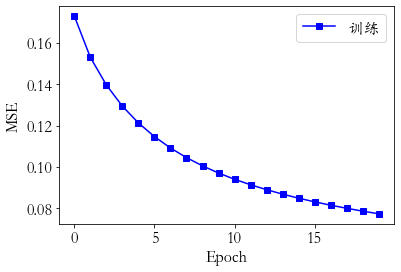

In [109]:
train(epochs=20)